### Interactive plots with dashboard features

C:\Users\Atique\AppData\Local\Temp\ipykernel_18104\3771151347.py:16: UserWarning:

Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



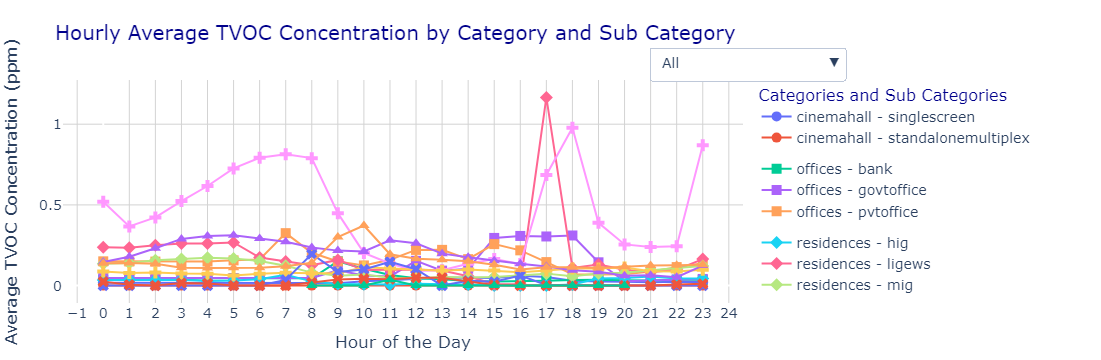

In [3]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px


file_path = 'Desktop/IAQ_Master_file/Master_File_TVOC.xlsx'  
df = pd.read_excel(file_path, sheet_name='tvoc_2')


df['tvoc'] = pd.to_numeric(df['tvoc'], errors='coerce') # Convert 'tvoc' column to numeric, forcing errors to NaN


df = df.dropna(subset=['category', 'sub_category', 'tvoc', 'date_time']) # dropping rows with NaN values in relevant columns


df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df = df.dropna(subset=['date_time'])


df['hour'] = df['date_time'].dt.hour


hourly_avg = df.groupby(['category', 'sub_category', 'hour'])['tvoc'].mean().reset_index()


fig = go.Figure() #  interactive plot

# Get unique categories and sub_categories
categories = hourly_avg['category'].unique()
sub_categories = hourly_avg['sub_category'].unique()


marker_symbols = ['circle', 'square', 'diamond', 'cross', 'x', 'triangle-up', 'triangle-down', 'triangle-left', 'triangle-right']

# line plot for each sub_category within each category
for category in categories:
    for sub_category in sub_categories:
        sub_category_data = hourly_avg[(hourly_avg['category'] == category) & (hourly_avg['sub_category'] == sub_category)]
        if not sub_category_data.empty:
            fig.add_trace(go.Scatter(
                x=sub_category_data['hour'],
                y=sub_category_data['tvoc'],
                mode='lines+markers',
                name=f'{category} - {sub_category}',
                legendgroup=category,
                marker=dict(symbol=marker_symbols[categories.tolist().index(category) % len(marker_symbols)], size=10),
                hovertemplate=f'<b>{category} - {sub_category}</b><br>Hour: {{x}}<br>TVOC: {{y:.2f}} ppm<extra></extra>'
            ))

# dropdown menus for interactive filtering
dropdown_buttons = [
    dict(label="All",
         method="update",
         args=[{"visible": [True] * len(fig.data)},
               {"title": "All Categories and Sub Categories"}]),
]

for category in categories:
    visible = [trace.name.startswith(category) for trace in fig.data]
    dropdown_buttons.append(
        dict(label=category,
             method="update",
             args=[{"visible": visible},
                   {"title": f"{category} - Sub Categories"}])
    )

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons,
            x=1.15,
            xanchor='right',
            y=1.15,
            yanchor='top'
        )
    ]
)

# Aesthetics
fig.update_layout(
    title='Hourly Average TVOC Concentration by Category and Sub Category',
    xaxis_title='Hour of the Day',
    yaxis_title='Average TVOC Concentration (ppm)',
    xaxis=dict(tickmode='linear', dtick=1),  # Set x-axis ticks from 0 to 23
    showlegend=True,
    plot_bgcolor='white',  # Set plot background to white
    paper_bgcolor='white',  # Set paper background to white
    font=dict(size=14),
    title_font=dict(size=20, color='darkblue'),
    legend=dict(
        title='Categories and Sub Categories',
        title_font=dict(size=16, color='darkblue'),
        font=dict(size=14),
    ),
    margin=dict(l=40, r=40, t=80, b=40),  # Adjust margins
    hovermode='closest'  # Enhance hover interaction
)

# gridlines and make the plot visually appealing
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')


fig.show()


fig.write_html('hourly_avg_tvoc_by_category_sub_category3.html')


fig.write_image('hourly_avg_tvoc_by_category_sub_category3.png')